# hierarchical clustering

In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("E:\\materials\\Assignment\\Assignment7\\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())  #x =(i-i.min())/(i.std())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])    
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


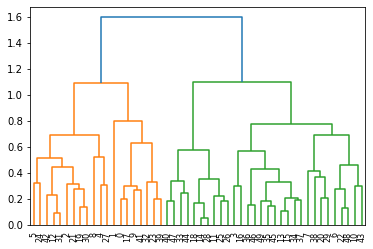

In [5]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))  # complete=single=average

In [6]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete').fit(df_norm)
hc
cluster_labels=pd.Series(hc.labels_)
data['clust']= cluster_labels
data
print(hc)
print(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)
        Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust
0          Alabama    13.2      236        58  21.2      0
1           Alaska    10.0      263        48  44.5      0
2          Arizona     8.1      294        80  31.0      0
3         Arkansas     8.8      190        50  19.5      1
4       California     9.0      276        91  40.6      0
5         Colorado     7.9      204        78  38.7      0
6      Connecticut     3.3      110        77  11.1      1
7         Delaware     5.9      238        72  15.8      1
8          Florida    15.4      335        80  31.9      0
9          Georgia    17.4      211        60  25.8      0
10          Hawaii     5.3       46        83  20.2      1
11           Idaho     2.6      120        54  14.2      2
12        Illinois    10.4      249        83  24.0      0
13         Indiana     7.2      113        65  21.0      1
14            Iowa     2.2       56        57  11.3      

In [7]:
data.iloc[:,1:].groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


In [8]:
data.sort_values('clust')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


In [9]:
#data.to_csv('h.csv')    # create a new file in current workind directory

# k mean

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [11]:
data = pd.read_csv("E:\\materials\\Assignment\\Assignment7\\crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
df_norm = norm_func(data.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [14]:
kmeans_clust=KMeans(n_clusters=2)
kmeans_clust.fit(df_norm)



KMeans(n_clusters=2)

In [15]:
kmeans_clust.labels_     #it gives the label which cluster each observation belong to which cluster

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [16]:
#df_norm.iloc[kmeans_clust.labels_==0,:]
#df_norm.iloc[kmeans_clust.labels_==1,:]
#df_norm.iloc[kmeans_clust.labels_==2,:]
df_norm.iloc[kmeans_clust.labels_==3,:]

,Murder,Assault,UrbanPop,Rape


In [17]:
kmeans_clust.cluster_centers_[0]#.reshape(1,4).shape
#kmeans_clust.labels_

array([0.68463855, 0.72003425, 0.61694915, 0.56498708])

In [18]:
data["clusterID"]=pd.Series(kmeans_clust.labels_)

result=data.iloc[:,1:].groupby(data.clusterID).mean()
result


,Murder,Assault,UrbanPop,Rape,clusterID
clusterID,,,,,
0,12.165,255.250000,68.400000,29.165000,0
1,4.870,114.433333,63.633333,15.943333,1


In [19]:
kmeans_clust.cluster_centers_
data["clusterID"]=pd.Series(kmeans_clust.labels_)

kmeans_clust.cluster_centers_[0].shape

(4,)

In [20]:
import seaborn as sns
from sklearn.metrics import silhouette_score
%matplotlib inline
print("silhouette coifficent: %0.3f"  %silhouette_score(df_norm, kmeans_clust.labels_))

silhouette coifficent: 0.424


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


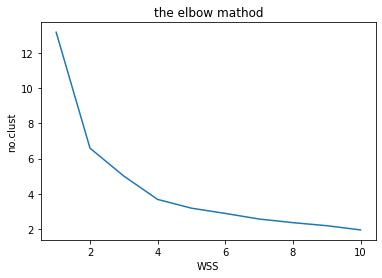

In [21]:

WSS = [] # variable for storing total within sum of squares for each kmeans 
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS.append(kmeans.inertia_) 
plt.plot(range(1,11),WSS)
plt.title('the elbow mathod')
plt.xlabel('WSS')
plt.ylabel("no.clust")
plt.show()

Text(0, 0.5, 'total_within_SS')

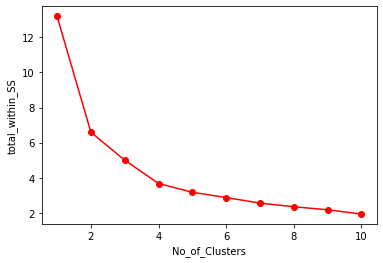

In [22]:
plt.plot(range(1,11),WSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")    #'ro_'  red,dout,line

# DBSCAN clustering

In [23]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [24]:
data = pd.read_csv("E:\\materials\\Assignment\\Assignment7\\crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [26]:
#remove categorical data
#data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [27]:
#df.values take numeric data from dataset
array=data.iloc[:,1:]
array

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [28]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [29]:
# eps= ramdon value,  min_sample=n+1  ,n=total number  of columns
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1)

In [30]:
#Noisy samples are given the label -1.
#set(dbscan.labels_)
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [31]:
#create DataFrame
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [32]:
 clustered = pd.concat([data,cl],axis=1)
clustered

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [33]:
#find the outleir 
clustered[clustered['cluster']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1
10,Hawaii,5.3,46,83,20.2,-1


In [34]:
# without outleir
clustered[clustered['cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
24,Missouri,9.0,178,70,28.2,0
25,Montana,6.0,109,53,16.4,0


In [35]:

import seaborn as sns
from sklearn.metrics import silhouette_score
%matplotlib inline
print("silhouette coifficent: %0.3f"  %silhouette_score(X, dbscan.labels_))   # 0.195  is the overlapping cluster 

silhouette coifficent: 0.195


In [36]:
#this mean is with outleir
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster      -0.400
dtype: float64

In [37]:
# this is without outlier
clustered[clustered['cluster']==0].mean()

Murder        4.904167
Assault     108.625000
UrbanPop     61.708333
Rape         16.516667
cluster       0.000000
dtype: float64